# Import dateset and the libraries  

https://scikit-learn.org/1.6/modules/generated/sklearn.preprocessing.StandardScaler.html

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# It helps to display what happens in the sklearn program
# More helpful during the ml Pipeline
from sklearn import set_config
set_config(display='diagram')

In [5]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df=df.iloc[:,2:]

In [7]:
df.sample(5)

,Age,EstimatedSalary,Purchased
173,34,43000,0
288,41,79000,0
373,59,130000,1
371,60,83000,1
375,46,32000,1


# Train test split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [10]:
x = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

In [96]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.3, random_state=0)

In [73]:
x_train.shape

(280, 2)

In [74]:
x_test.shape

(120, 2)

# StandardScaler

In [75]:
# import Standard Scaler for standardization 
# It is also called z-score Normalization 
from sklearn.preprocessing import StandardScaler

# crate one object 
scaler  = StandardScaler()

In [76]:
# fit the scaler to the train dataset, it will learn the parameters
# Learn only the train Dataset 
scaler.fit(x_train)

StandardScaler()

In [77]:
# But Transform both train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [78]:
# Access the attribute from scaler object
# Attribute we knew that at the end we found the underscore
print(scaler.mean_)
print(scaler.scale_)
print(scaler.var_)

[3.78642857e+01 6.98071429e+04]
[1.01999375e+01 3.45792870e+04]
[1.04038724e+02 1.19572709e+09]


In [79]:
# This is the original dataset
x_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


### fit and transfrom and see 

In [80]:
# After fit and train we got the array
x_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [81]:
# Covert into dataframe
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [82]:
x_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [83]:
x_test_scaled

,Age,EstimatedSalary
0,-0.771013,0.497201
1,0.013305,-0.572804
2,-0.280814,0.150172
3,-0.771013,0.265849
4,-0.280814,-0.572804
...,...,...
115,1.091743,-0.139018
116,0.699584,1.769639
117,-0.672973,0.555039
118,0.797624,0.352606


In [84]:
np.round(x_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [85]:
np.round(x_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Effect of Scaling

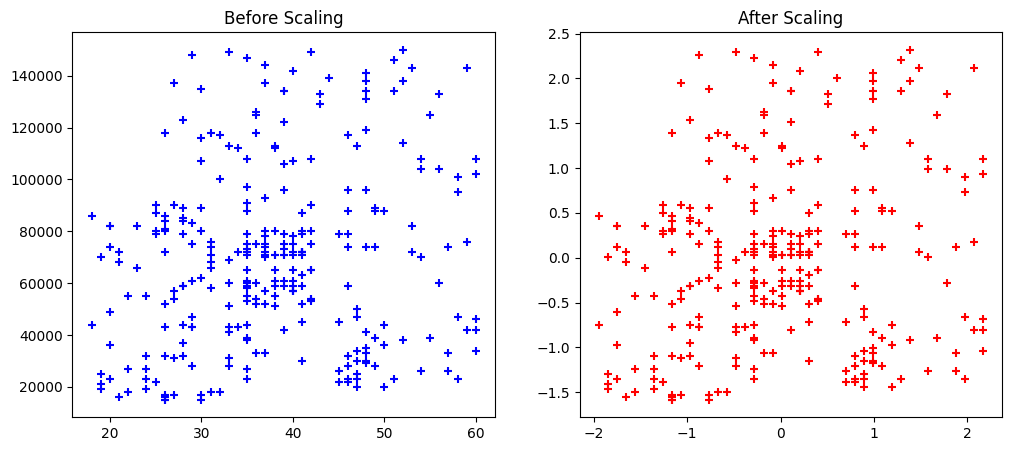

In [107]:
# now Visualse the effect of before and after 
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'], color='blue', marker='+')
ax1.set_title("Before Scaling")

ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'], color='red', marker='+')
ax2.set_title("After Scaling")

plt.show()

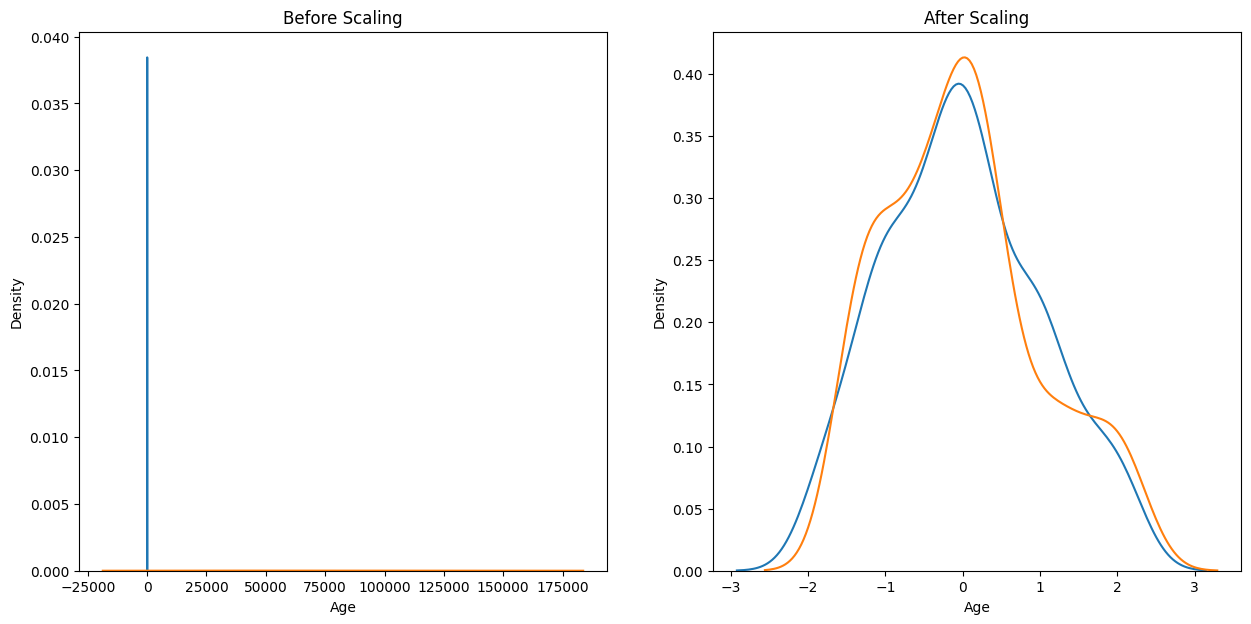

In [87]:
# Let's see now kde plot to understand about what happens after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 7))

# Before Scaling
# Due the age & estimated salary is not in same scale 
# So one is tall another is plat
ax1.set_title("Before Scaling")
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# After Scaling
# Due to both axis sharing same axis 
# so we can easily compare
ax2.set_title("After Scaling")
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)

plt.show()

# Comparison of Distributions

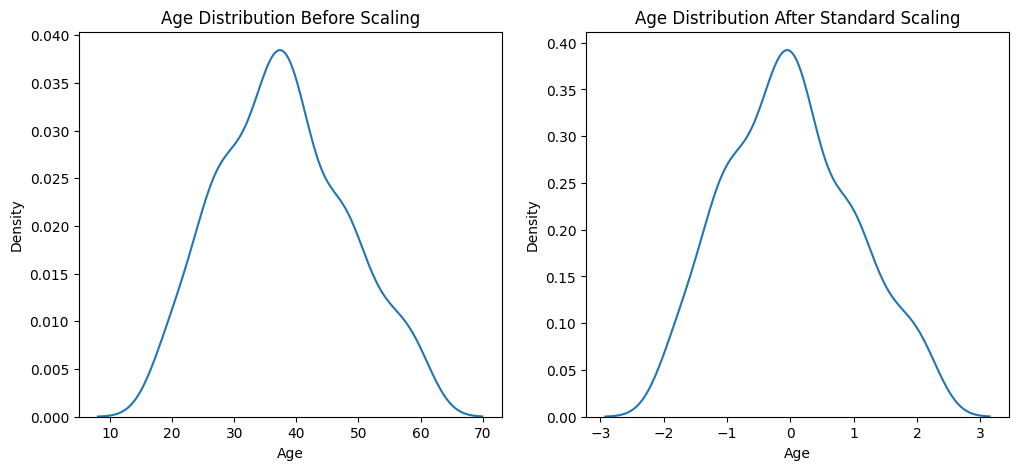

In [88]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
plt.show()

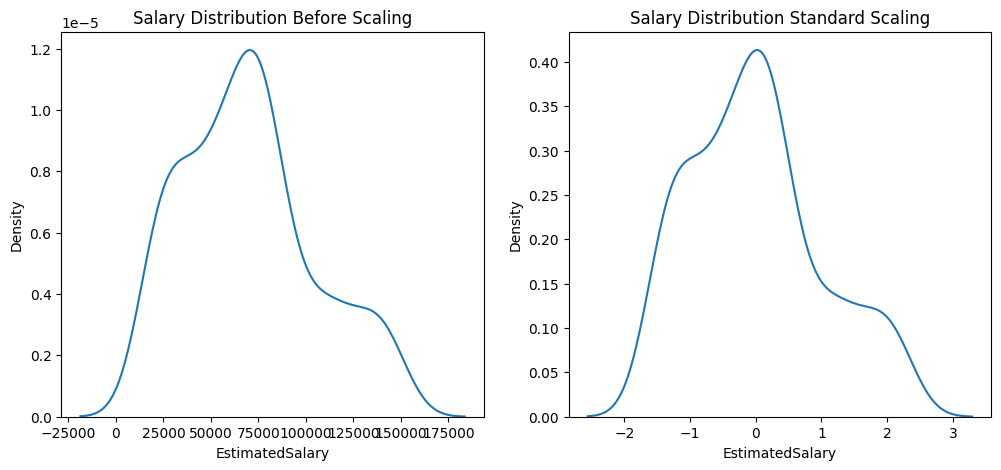

In [89]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Why scaling is important?

In [90]:
# let's take an algorithm to understand what happens
from sklearn.linear_model import LogisticRegression

In [91]:
# Create two objects 

# before scaling
lr = LogisticRegression()
# After scaling
lr_scaled = LogisticRegression()

In [98]:
y_train

92     0
223    1
234    0
232    1
377    0
      ..
323    1
192    0
117    0
47     0
172    0
Name: Purchased, Length: 280, dtype: int64

In [99]:
lr.fit(x_train,y_train)


LogisticRegression()

In [100]:
lr_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [105]:
y_pred = lr.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1])

In [106]:
y_pred_scaled = lr_scaled.predict(x_test_scaled)
y_pred_scaled

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1])

In [108]:
# Check the accuracy 
from sklearn.metrics import accuracy_score

In [111]:
print("Actual :",accuracy_score(y_test,y_pred))
print("Scaled :",accuracy_score(y_test,y_pred_scaled))

Actual : 0.875
Scaled : 0.8666666666666667


In [114]:
from sklearn.model_selection import cross_val_score

In [119]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.875


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

accuracy = cross_val_score(LogisticRegression(), X=df.drop('Purchased', axis=1), y=df['Purchased'], cv=5, scoring='accuracy')
print("Cross-validated Accuracy scores:", accuracy)
print("Mean CV Accuracy:", accuracy.mean())

Cross-validated Accuracy scores: [0.6875 0.9625 0.925  0.8125 0.75  ]
Mean CV Accuracy: 0.8275


### Apply on Decision tree algorithm

In [125]:
from sklearn.tree import DecisionTreeClassifier

In [126]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [128]:
dt.fit(x_train,y_train)
dt_scaled.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [129]:
y_pred = dt.predict(x_test)
y_pred_scaled = dt_scaled.predict(x_test_scaled)

In [130]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.875


In [131]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# Effect of Outlier

In [ ]:
# Due to this dataset not contains the outlier 
# So we added to see what happens during the scaling process
new_data = pd.DataFrame({
    'Age': [5, 90, 95],
    'EstimatedSalary': [1000, 250000, 350000],
    'Purchased': [0, 1, 1]
})

df = pd.concat([df, new_data], ignore_index=True)

In [ ]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


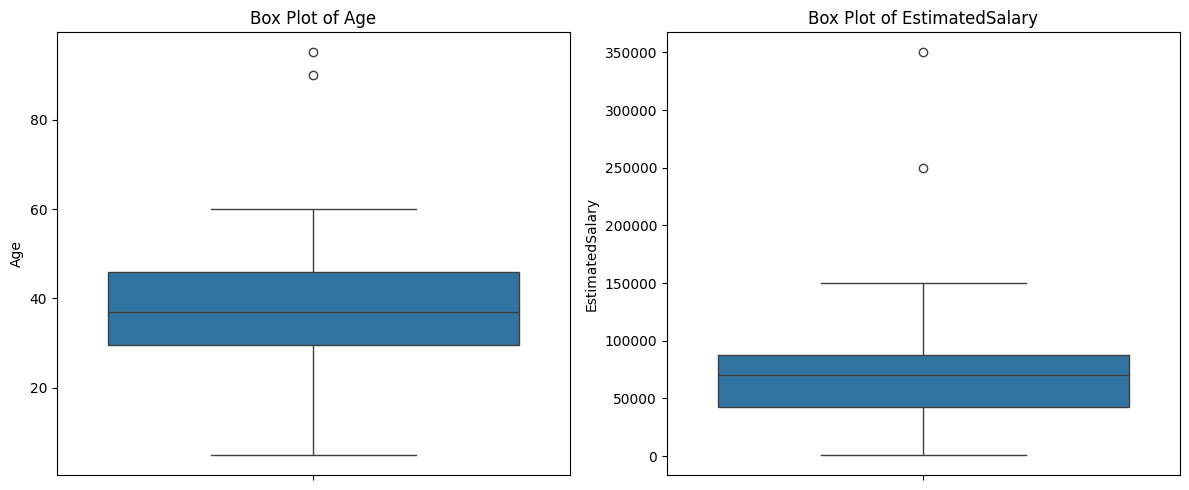

In [150]:
# Box plot for Age
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Age'])
plt.title('Box Plot of Age')

# Box plot for EstimatedSalary
plt.subplot(1, 2, 2)
sns.boxplot(y=df['EstimatedSalary'])
plt.title('Box Plot of EstimatedSalary')

plt.tight_layout()
plt.show()

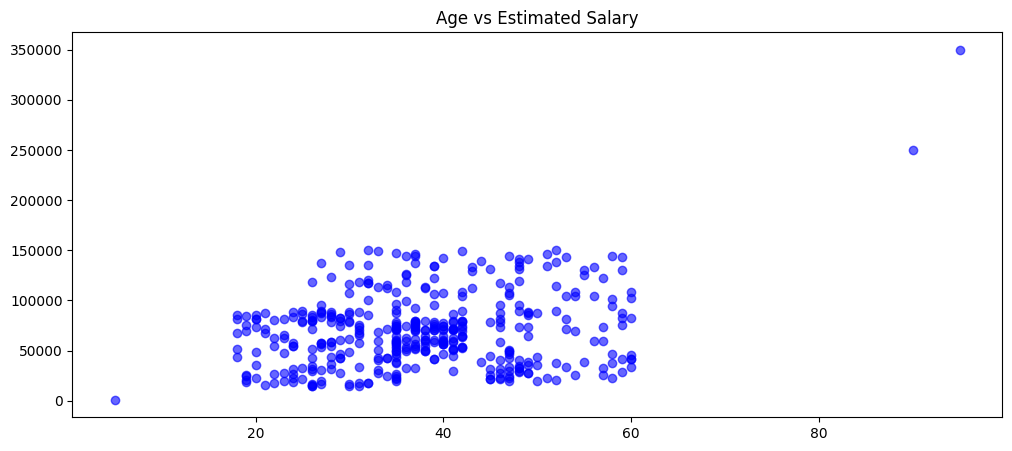

In [157]:
plt.figure(figsize=(12, 5))  
plt.scatter(df['Age'], df['EstimatedSalary'], c='blue', alpha=0.6, )
plt.title('Age vs Estimated Salary')
plt.show()


In [144]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.3, random_state=0)

In [146]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [147]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=X_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=X_test.columns)

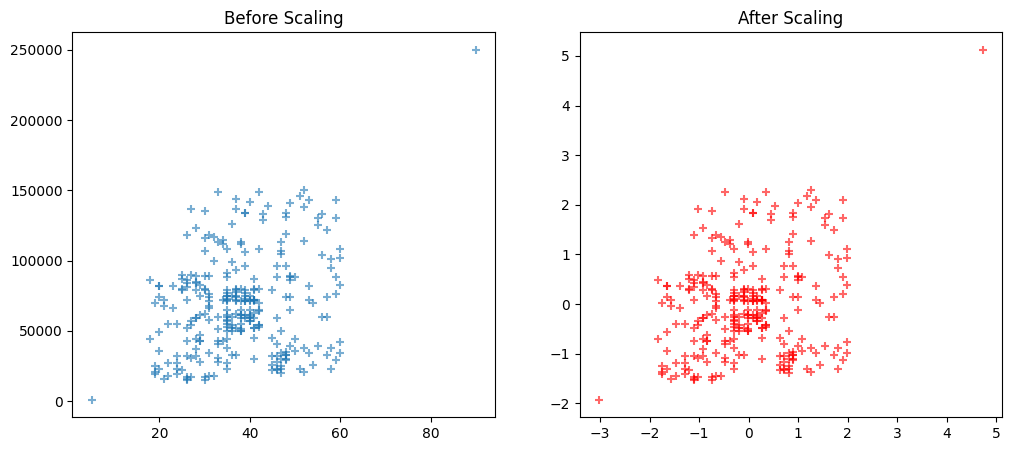

In [161]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'], marker='+', alpha=0.6)
ax1.set_title("Before Scaling")

ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'],color='red',  marker='+', alpha=0.6)
ax2.set_title("After Scaling")
plt.show()

In [ ]:
# This is the outlier and it same as the before